In [79]:
import torch
import matplotlib.pyplot as plt

def common_tkn_cnt_per_layer(state):
    ks = state['ks']
    q_timber = state['q_timber']
    k = state['k']
    v = state['v']
    mask_k = state['mask_k']
    block_size_q = state['block_size_q']
    block_size_k = state['block_size_k']
    ensemble = state['ensemble'],
    ensemble_model_setting = state['ensemble_model_setting' ]
    ensemble_method = state['ensemble_method'],
    ensemble_method_final = state['ensemble_method_final']
    ensemble_per_layer_n = state['ensemble_per_layer_n']
    ensemble_per_attn_iter_n = state['ensemble_per_attn_iter_n']
    ensemble_model_n = state['ensemble_model_n']
    ensemble_particular_layer = state['ensemble_particular_layer']
    layer_id = state['layer_id']

    ensemble_attn_mask_per_layer = state['ensemble_attn_mask_per_layer']
    per_query_token_cnt_diclist = state['per_query_token_cnt_diclist']
    ensembled_indices = state['ensembled_indices']
    origin_sparsity = state['origin_sparsity']
    sparsity_per_layer = state['sparsity_per_layer']
    sparsity_ratio = state['sparse_ratio']

    N_H, TDST, HID = q_timber.shape
    _, TSRC, _ = k.shape
    assert len(per_query_token_cnt_diclist) == N_H * TDST//block_size_q
    # per_query_token_cnt_diclist : N_H * TDST//block_size_q each having a dictionary

    # Assume per_query_token_cnt_diclist is defined and populated with dictionaries
    # Assume ensemble_model_n is defined (the maximum value any key can have)
    # Assume TSRC is defined (keys greater or equal to this should be skipped)

    # Initialize the final dictionary with keys from 0 to ensemble_model_n and values set to 0
    final_count_dict = {i: 0 for i in range(1, ensemble_model_n+1 )} # NOTE ensemble_model_n +1

    # Iterate through each dictionary in per_query_token_cnt_diclist
    for dic in per_query_token_cnt_diclist:
        # Iterate through each key, value pair in the dictionary
        for key, value in dic.items():
            # Skip if key is greater or equal to TSRC
            if key >= TSRC:
                continue
            # if value == ensemble_model_n:
            #     continue
            # Increment the count for the value in the final dictionary
            final_count_dict[value] += 1

    return final_count_dict


    # per_head_token_cnt_dic2list = [per_query_token_cnt_diclist[i:i+(TDST//block_size_q)] for i in range(0, len(per_query_token_cnt_diclist), TDST//block_size_q)]

    # for h in range(N_H):
    #     print(f"plot h : ", {})

    #     N = 1
    #     print(f"N hardcoded to : N={N}")
    #     q_k_map_h = torch.zeros((TDST//block_size_q, TSRC))

    #     for i, per_query_cnt in enumerate(per_head_token_cnt_dic2list[h]):
    #         for idx, count in per_query_cnt.items():
    #             if idx >= TSRC:
    #                 continue
    #             q_k_map_h[i, idx] = count

    #     print(q_k_map_h)
    #     # Visualization
    #     plt.figure(figsize=(15, 6))
    #     plt.imshow(q_k_map_h, cmap='hot', interpolation='nearest', aspect='auto')
    #     plt.colorbar()
    #     plt.title(f'# of common token selection btw models : l_{layer_id}_h{N*h}')
    #     plt.xlabel('TSRC')
    #     plt.ylabel('TDST_BQ')
    #     plt.show()


In [80]:
def plot_histogram(dic_list):
    fig, axs = plt.subplots(8, 5, figsize=(20, 16))  # 40 subplots on a grid of 8x5
    fig.tight_layout(pad=3.0)

    # Iterate over each layer_id and its corresponding dictionary
    for layer_id, dic in enumerate(dic_list):
        # Locate the subplot row and column
        ax = axs[layer_id // 5, layer_id % 5]
        
        # Data for the histogram: keys are x, values are heights
        keys = list(dic.keys())
        values = [dic[key] for key in keys]
        
        # Plotting the histogram for this layer
        ax.bar(keys, values, color='turquoise', edgecolor='black')
        
        # Set plot titles and labels
        ax.set_title(f'Layer {layer_id}')
        ax.set_xticks(keys)
        ax.set_xlabel('selected by # of models')
        ax.set_ylabel('# of tokens')

    # Adjust layout to make room for plot titles
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.55, wspace=0.35)
    plt.show()

In [81]:
def plot_per_layer():
    ensemble_model_setting = "random_pruning"
    ensemble_method = "final_attn"
    ensemble_method_final = "all_agree"
    ensemble_model_n = 5
    ensemble_per_attn_iter_n = 5

    ensemble_per_layer_n = 1

    # excluded_numbers = [0, 2, 5, 20, 30, 38, 39]
    numbers_list = [i for i in range(40)] #  if i not in excluded_numbers

    dic_list = []
    for l in numbers_list:
        # if l == 3:
        #     break
        layer_id = l
        ensemble_particular_layer = l

        ###
        path = f'../../../../cache/ensemble/llama13b_32k/method/{ensemble_model_setting}_{ensemble_method}_{ensemble_method_final}/l_{layer_id}_m_{ensemble_model_n}_pl_{ensemble_per_layer_n}_pat{ensemble_per_attn_iter_n}_ln{ensemble_particular_layer}.pth'
        ###
        state = torch.load(path, map_location='cpu')

        dic_per_layer = common_tkn_cnt_per_layer(state)
        dic_list.append(dic_per_layer)
        # print(dic_per_layer)

    plot_histogram(dic_list)

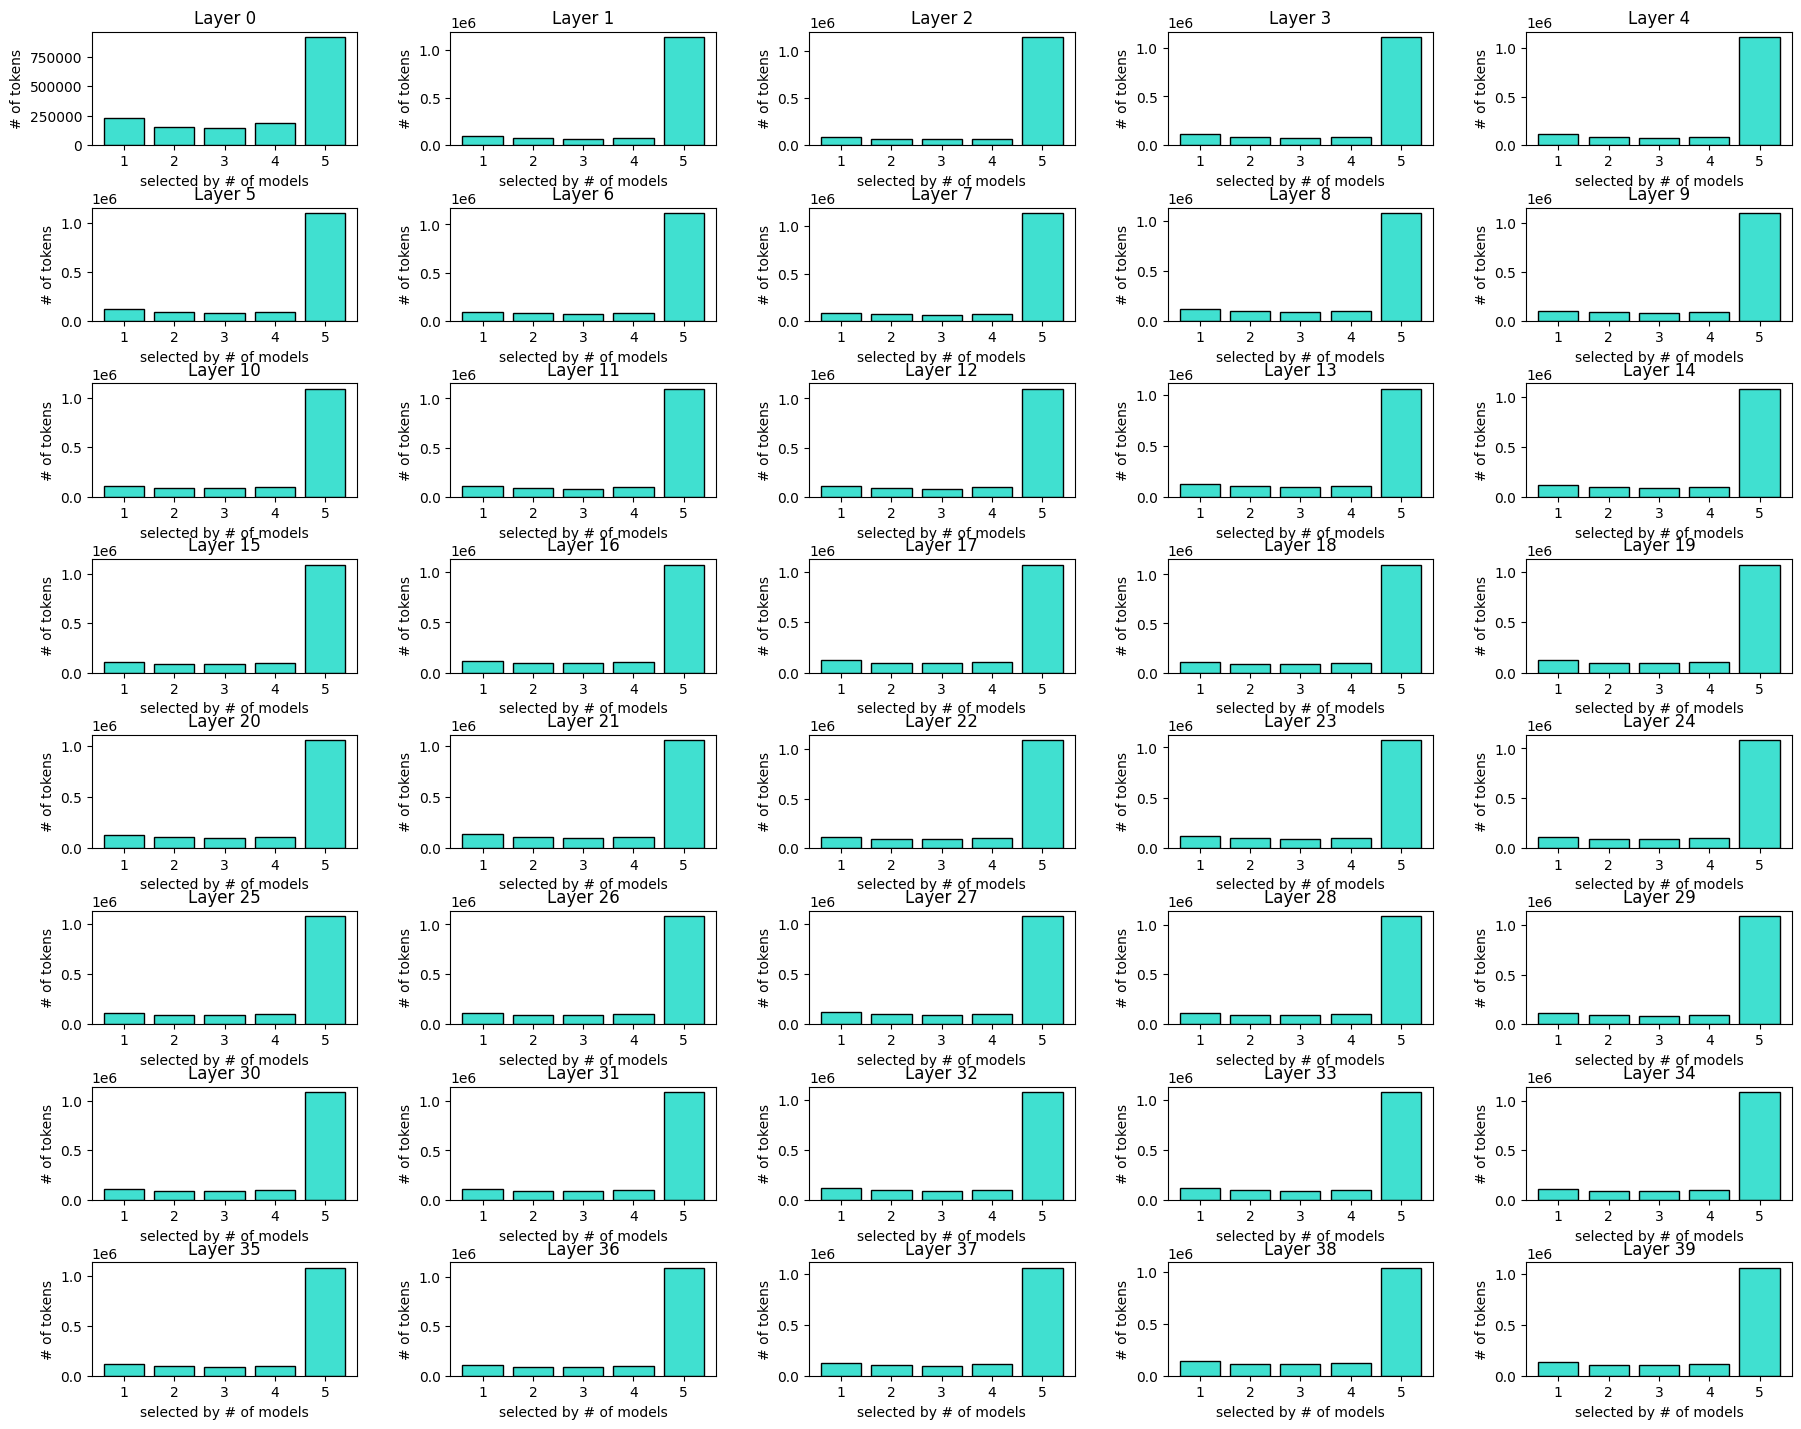

In [82]:
plot_per_layer()

In [83]:
96636 + 72787*2 +66578*3+73936*4+1136672*5

6421048

In [84]:
40*128*256*5

6553600